# Decoding through the epoch's window time the sentence / constituent embeddings

We:

- Calculate the embeddings for each sentence / constituent

- Decode it on the epoch window

- Plot it for each condition (level / start)



In [1]:
from dataset import epoch_add_metadata, get_path, get_subjects
from utils import decoding_from_criterion
import mne
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import match_list
import spacy

In [2]:
modality = "visual"
nlp = spacy.load("fr_core_news_sm")
path = get_path(modality)
subjects = get_subjects(path)
runs = 9
decoding_criterion = 'embeddings'
epoch_windows = {"word": {"onset_min": -0.3, "onset_max": 1.0, "offset_min": -1.0, "offset_max": 0.3},
                  "constituent": {"offset_min": -2.0, "offset_max": 0.5, "onset_min": -0.5, "onset_max": 2.0},
                  "sentence": {"offset_min": -4.0, "offset_max": 1.0, "onset_min": -1.0, "onset_max": 4.0}}
levels = ('word','constituent','sentence')
starts = ('onset', 'offset')
all_scores = []
all_evos = []

if isinstance(levels, str):
    levels = [levels]
    
if isinstance(starts, str):
    starts = [starts]
      
# Iterate on subjects to epochs, and mean later
for subject in subjects[2:]:
    dict_epochs = epoch_add_metadata(modality, subject, levels, starts, runs, epoch_windows)
    
    all_scores = decoding_from_criterion(decoding_criterion, dict_epochs, starts, levels, subject, all_scores)
 
all_scores.to_csv(f'./scores_{modality}_{decoding_criterion}', index=False)


Reading raw files for modality: visual

 Epoching for run 1, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 36000 ... 517999 =     36.000 ...   517.999 secs
Ready.
Reading e

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 81 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


Trigger channel has a non-zero initial value of 8 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1466 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 481999  =      0.000 ...   481.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.2s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1412 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
433 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 433 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1412 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
446 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 446 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 2, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-02_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 14000 ... 532999 =     14.000 ...   532.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 99 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI

1607 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reading 0 ... 518999  =      0.000 ...   518.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.8s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1563 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1563 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
460 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 460 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
123 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 123 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1563 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1563 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
476 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 476 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
141 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 141 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


2 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 3, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-03_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 12000 ... 566999 =     12.000 ...   566.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 146 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1719 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Reading 0 ... 554999  =      0.000 ...   554.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.3s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1660 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
510 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 510 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
156 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 156 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1660 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
184 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 184 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 4, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-04_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 11000 ... 500999 =     11.000 ...   500.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 134 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


1491 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
Reading 0 ... 489999  =      0.000 ...   489.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.5s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1444 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1444 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
443 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 443 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1444 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1444 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
458 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 458 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 5, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-05_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 12000 ... 472999 =     12.000 ...   472.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 121 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1373 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 20]
Reading 0 ... 460999  =      0.000 ...   460.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.3s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1336 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
397 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 397 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
149 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 149 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1336 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
414 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 414 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
167 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 167 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 6, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-06_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 9000 ... 575999 =      9.000 ...   575.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 139 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1698 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reading 0 ... 566999  =      0.000 ...   566.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.9s finished


Adding metadata with 31 columns
1696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1696 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
488 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 488 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


2 bad epochs dropped
Adding metadata with 31 columns
1696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1696 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
488 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 488 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 7, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-07_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 522999 =      8.000 ...   522.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 140 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1553 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 514999  =      0.000 ...   514.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.0s finished


Adding metadata with 31 columns
1553 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1553 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
493 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 493 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
173 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 173 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
1553 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1553 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
493 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 493 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
173 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 173 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 8, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-08_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 13000 ... 462999 =     13.000 ...   462.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 116 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1390 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 21]
Reading 0 ... 449999  =      0.000 ...   449.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.2s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1319 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1319 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
400 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 400 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
119 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 119 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1319 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1319 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
427 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 427 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 9, subject: 3

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-3/ses-01/meg/sub-3_ses-01_task-read_run-09_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 9000 ... 553999 =      9.000 ...   553.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 148 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1654 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Reading 0 ... 544999  =      0.000 ...   544.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.1s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
497 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 497 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
158 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 158 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
523 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 523 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
191 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 191 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
13553 matching events found
No baseline correction applied
Adding metadata with 31 columns


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


4114 matching events found
No baseline correction applied
Adding metadata with 31 columns
1307 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
13553 matching events found
No baseline correction applied
Adding metadata with 31 columns
4264 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
1477 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


......................................................................................................................................................................................Reading raw files for modality: visual

 Epoching for run 1, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 133 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1466 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 463999  =      0.000 ...   463.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.7s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1412 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
433 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 433 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1412 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
446 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 446 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 2, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-02_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 15000 ... 520999 =     15.000 ...   520.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 137 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1606 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reading 0 ... 505999  =      0.000 ...   505.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.7s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1563 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1563 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
460 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 460 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
123 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 123 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1563 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1563 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
476 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 476 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
141 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 141 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 3, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-03_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 13000 ... 568999 =     13.000 ...   568.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 145 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


1718 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Reading 0 ... 555999  =      0.000 ...   555.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    8.2s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1660 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
510 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 510 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
156 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 156 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


2 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1660 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
184 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 184 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 4, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-04_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 11000 ... 500999 =     11.000 ...   500.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 134 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


1491 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
Reading 0 ... 489999  =      0.000 ...   489.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.9s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1444 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1444 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
443 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 443 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1444 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1444 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
458 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 458 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 5, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-05_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 469999 =      8.000 ...   469.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 120 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


1373 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 20]
Reading 0 ... 461999  =      0.000 ...   461.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.5s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1336 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
397 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 397 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
149 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 149 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1336 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
414 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 414 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
167 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 167 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 6, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-06_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 7000 ... 576999 =      7.000 ...   576.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 131 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1696 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reading 0 ... 569999  =      0.000 ...   569.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    8.1s finished


Adding metadata with 31 columns
1696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1696 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
488 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 488 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
1696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1696 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
488 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 488 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 7, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-07_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 9000 ... 525999 =      9.000 ...   525.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 135 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1553 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 516999  =      0.000 ...   516.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.8s finished


Adding metadata with 31 columns
1553 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1553 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
493 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 493 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
173 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 173 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
1553 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1553 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
493 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 493 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
173 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 173 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 8, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-08_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 6000 ... 453999 =      6.000 ...   453.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 122 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1390 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 21]
Reading 0 ... 447999  =      0.000 ...   447.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.0s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1319 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1319 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
400 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 400 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
119 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 119 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1319 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1319 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
427 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 427 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 9, subject: 4

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-4/ses-01/meg/sub-4_ses-01_task-read_run-09_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 10000 ... 551999 =     10.000 ...   551.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 156 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1652 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Reading 0 ... 541999  =      0.000 ...   541.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    8.7s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
497 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 497 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
158 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 158 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
523 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 523 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
191 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 191 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
13553 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
4114 matching events found
No baseline correction applied
Adding metadata with 31 columns
1307 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
13553 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
4264 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
1478 matching events found
No baseline correction applied
......................................................................................................................................................................................Reading raw files for modality: visual

 Epoching for run 1, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_u

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 128 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1468 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 465999  =      0.000 ...   465.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.3s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1412 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
433 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 433 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1412 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
446 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 446 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 2, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-02_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 514999 =      8.000 ...   514.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 134 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1605 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reading 0 ... 506999  =      0.000 ...   506.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.5s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1563 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1563 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
460 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 460 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
123 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 123 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1563 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1563 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
476 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 476 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
141 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 141 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 3, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-03_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 7000 ... 567999 =      7.000 ...   567.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 130 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1718 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Reading 0 ... 560999  =      0.000 ...   560.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.1s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1660 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
510 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 510 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
156 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 156 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1660 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
184 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 184 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 4, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-04_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 9000 ... 500999 =      9.000 ...   500.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 128 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1491 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
Reading 0 ... 491999  =      0.000 ...   491.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.5s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1444 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1444 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
443 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 443 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 130 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1444 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1444 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
458 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 458 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 5, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-05_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 14000 ... 469999 =     14.000 ...   469.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 136 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1373 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 20]
Reading 0 ... 455999  =      0.000 ...   455.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.2s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1336 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
397 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 397 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
149 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 149 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1336 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
414 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 414 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
167 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 167 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 6, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-06_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 7000 ... 575999 =      7.000 ...   575.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 134 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


1699 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Reading 0 ... 568999  =      0.000 ...   568.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.6s finished


Adding metadata with 31 columns
1696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1696 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
488 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 488 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


2 bad epochs dropped
Adding metadata with 31 columns
1696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1696 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
488 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 488 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 7, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-07_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 12000 ... 529999 =     12.000 ...   529.999 

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 133 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1554 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Reading 0 ... 517999  =      0.000 ...   517.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.8s finished


Adding metadata with 31 columns
1553 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1553 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
493 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 493 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
173 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 173 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
1553 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1553 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
493 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 493 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Adding metadata with 31 columns
173 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 173 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 8, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-08_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 460999 =      8.000 ...   460.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1391 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 21]
Reading 0 ... 452999  =      0.000 ...   452.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    5.9s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1319 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1319 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
400 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 400 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
119 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 119 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1319 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1319 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
427 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 427 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Reading raw files for modality: visual

 Epoching for run 9, subject: 5

Opening raw data file /home/is153802/data/LPP_MEG_visual/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-09_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 551999 =      8.000 ...   551.999 s

/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Omitted 151 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:57: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, ST

1652 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Reading 0 ... 543999  =      0.000 ...   543.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.1s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
497 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 497 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
158 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 158 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 1301 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped
Adding metadata with 31 columns
523 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 523 events and 2501 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Adding metadata with 31 columns
191 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 191 events and 5001 original time points (prior to decimation) ...


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:350: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=100 parameter will result in a sampling frequency of 10.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(sel, raw , start=start, level=level), decim=100,


1 bad epochs dropped


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
13553 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
4114 matching events found
No baseline correction applied
Adding metadata with 31 columns
1307 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)
/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


Adding metadata with 31 columns
13553 matching events found
No baseline correction applied
Adding metadata with 31 columns
4264 matching events found


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


No baseline correction applied
Adding metadata with 31 columns
1478 matching events found
No baseline correction applied


/mnt/localdrive/workspace-LPP/code/neurospin-petit-prince/decoding/local_testing/dataset.py:371: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  dict_epochs[epoch_key] = mne.concatenate_epochs(all_epochs_chosen)


......................................................................................................................................................................................

<Figure size 1280x800 with 0 Axes>

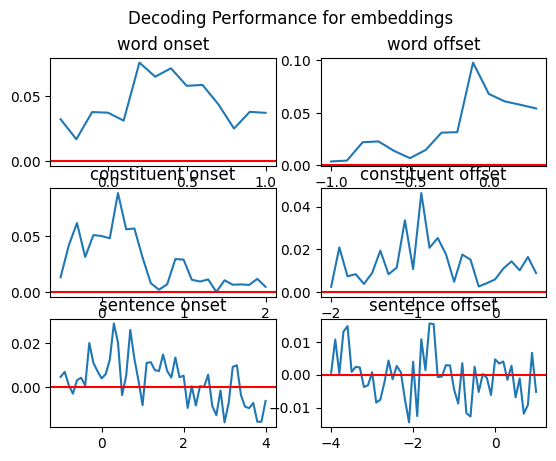

In [32]:
plot_scores(all_scores, levels, starts, decoding_criterion)

<Figure size 1280x800 with 0 Axes>

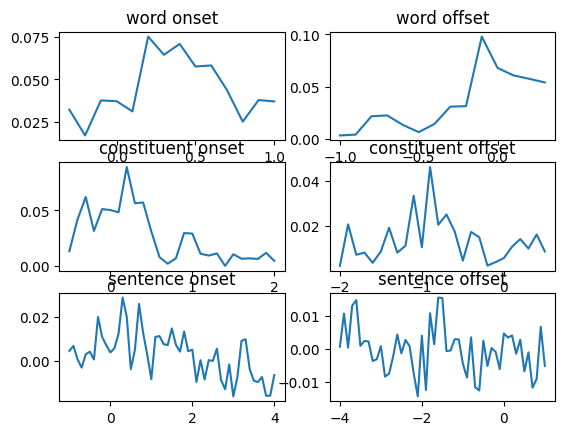

In [3]:
from utils import plot_scores
plot_scores(all_scores, levels, starts)

<Figure size 1280x800 with 0 Axes>

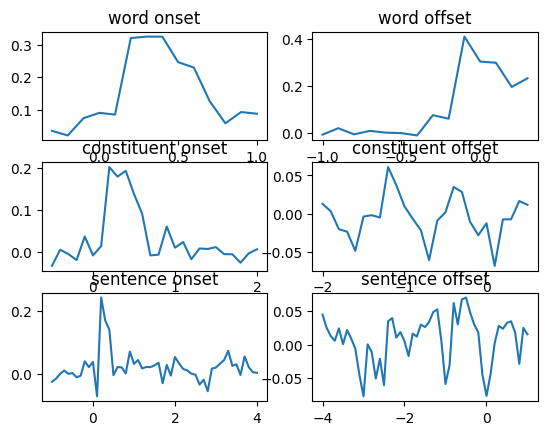

In [6]:
from utils import plot_scores
plot_scores(all_scores, levels, starts)

In [ ]:
modality = "auditory"
nlp = spacy.load("fr_core_news_sm")
path = get_path(modality)
subjects = get_subjects(path)
runs = 9
decoding_criterion = 'wlength'
epoch_windows = {"word": {"onset_min": -0.3, "onset_max": 1.0, "offset_min": -1.0, "offset_max": 0.3},
                  "constituent": {"offset_min": -2.0, "offset_max": 0.5, "onset_min": -0.5, "onset_max": 2.0},
                  "sentence": {"offset_min": -4.0, "offset_max": 1.0, "onset_min": -1.0, "onset_max": 4.0}}
levels = ('word','constituent','sentence')
starts = ('onset', 'offset')

if isinstance(levels, str):
    levels = [levels]
    
if isinstance(starts, str):
    starts = [starts]
      
# Iterate on subjects to epochs, and mean later
for subject in subjects[2:5]:
    dict_epochs = epoch_add_metadata(modality, subject, levels, starts, runs, epoch_windows)
    
    all_scores, all_evos = decoding_from_criterion(decoding_criterion, dict_epochs, starts, levels, subject)

In [ ]:
modality = "visual"
nlp = spacy.load("fr_core_news_sm")
path = get_path(modality)
subjects = get_subjects(path)
runs = 9
decoding_criterion = 'embeddings'
epoch_windows = {"word": {"onset_min": -0.3, "onset_max": 1.0, "offset_min": -1.0, "offset_max": 0.3},
                  "constituent": {"offset_min": -2.0, "offset_max": 0.5, "onset_min": -0.5, "onset_max": 2.0},
                  "sentence": {"offset_min": -4.0, "offset_max": 1.0, "onset_min": -1.0, "onset_max": 4.0}}
levels = ('word','constituent','sentence')
starts = ('onset', 'offset')

if isinstance(levels, str):
    levels = [levels]
    
if isinstance(starts, str):
    starts = [starts]
      
# Iterate on subjects to epochs, and mean later
for subject in subjects[2:20]:
    dict_epochs = epoch_add_metadata(modality, subject, levels, starts, runs, epoch_windows)
    
    all_scores, all_evos = decoding_from_criterion(decoding_criterion, dict_epochs, starts, levels, subject)

In [ ]:
# Todo: problem with offset: test duration